Benötigte Imports

In [8]:
import sqlite3
import pandas as pd
import numpy as np
import datetime
import logging
import matplotlib.pyplot as plt
import seaborn as sns

Logger konfigurieren

In [9]:
logging.basicConfig(filename="../Logs/log.txt", level=logging.DEBUG)

In [10]:
#connect to DB
conn = sqlite3.connect('../datawarehouse.db')
cursor = conn.cursor()
logging.debug(" "+str(datetime.datetime.now()) + " daten_qualitaet.ipynb opened a connection to the database")
print("Opened database successfully");

Opened database successfully


## Anzahl fehlender Werte ausgeben

In [11]:
careplans_df = pd.read_sql_query("SELECT * FROM careplans", conn)
conditions_df = pd.read_sql_query("SELECT * FROM conditions", conn)
immunizations_df = pd.read_sql_query("SELECT * FROM immunizations", conn)
medications_df = pd.read_sql_query("SELECT * FROM medications", conn)
observations_df = pd.read_sql_query("SELECT * FROM observations", conn)
patients_df = pd.read_sql_query("SELECT * FROM patients", conn)

In [12]:
tupel_of_dataframes = ((careplans_df, "careplans"), (conditions_df, "conditions"), (immunizations_df, "immunizations"), (medications_df, "medications"), (observations_df, "observations"), (patients_df, "patients"))


In [13]:
list_of_dfs = []
for ele in tupel_of_dataframes:
    print("------------------------------")
    print("Table: ", ele[1])
    list_of_dfs.append([ele[0].isnull().sum(), ele[1]])
    print(ele[0].isnull().sum())
 

------------------------------
Table:  careplans
Id                       0
START                    0
STOP                 17813
PATIENT                  0
ENCOUNTER                0
CODE                     0
DESCRIPTION              0
REASONCODE            3111
REASONDESCRIPTION     3111
dtype: int64
------------------------------
Table:  conditions
condition_code        0
START                 0
STOP              51448
PATIENT               0
ENCOUNTER             0
CODE                  0
DESCRIPTION           0
dtype: int64
------------------------------
Table:  immunizations
immunization_code    0
DATE                 0
PATIENT              0
ENCOUNTER            0
CODE                 0
DESCRIPTION          0
BASE_COST            0
dtype: int64
------------------------------
Table:  medications
START                    0
STOP                  5008
PATIENT                  0
PAYER                    0
ENCOUNTER                0
CODE                     0
DESCRIPTION             

In [15]:
a = pd.DataFrame(list_of_dfs[0][0], columns = ['SUM'])
b = pd.DataFrame(list_of_dfs[1][0], columns = ['SUM'])
c = pd.DataFrame(list_of_dfs[2][0], columns = ['SUM'])
d = pd.DataFrame(list_of_dfs[3][0], columns = ['SUM'])
e = pd.DataFrame(list_of_dfs[4][0], columns = ['SUM'])
f = pd.DataFrame(list_of_dfs[5][0], columns = ['SUM'])



,SUM
condition_code,0
START,0
STOP,51448
PATIENT,0
ENCOUNTER,0
CODE,0
DESCRIPTION,0


In [25]:
print(list_of_dfs[0][1])
print(list_of_dfs[1][1])
print(list_of_dfs[2][1])
print(list_of_dfs[3][1])
print(list_of_dfs[4][1])
print(list_of_dfs[5][1])

careplans
conditions
immunizations
medications
observations
patients


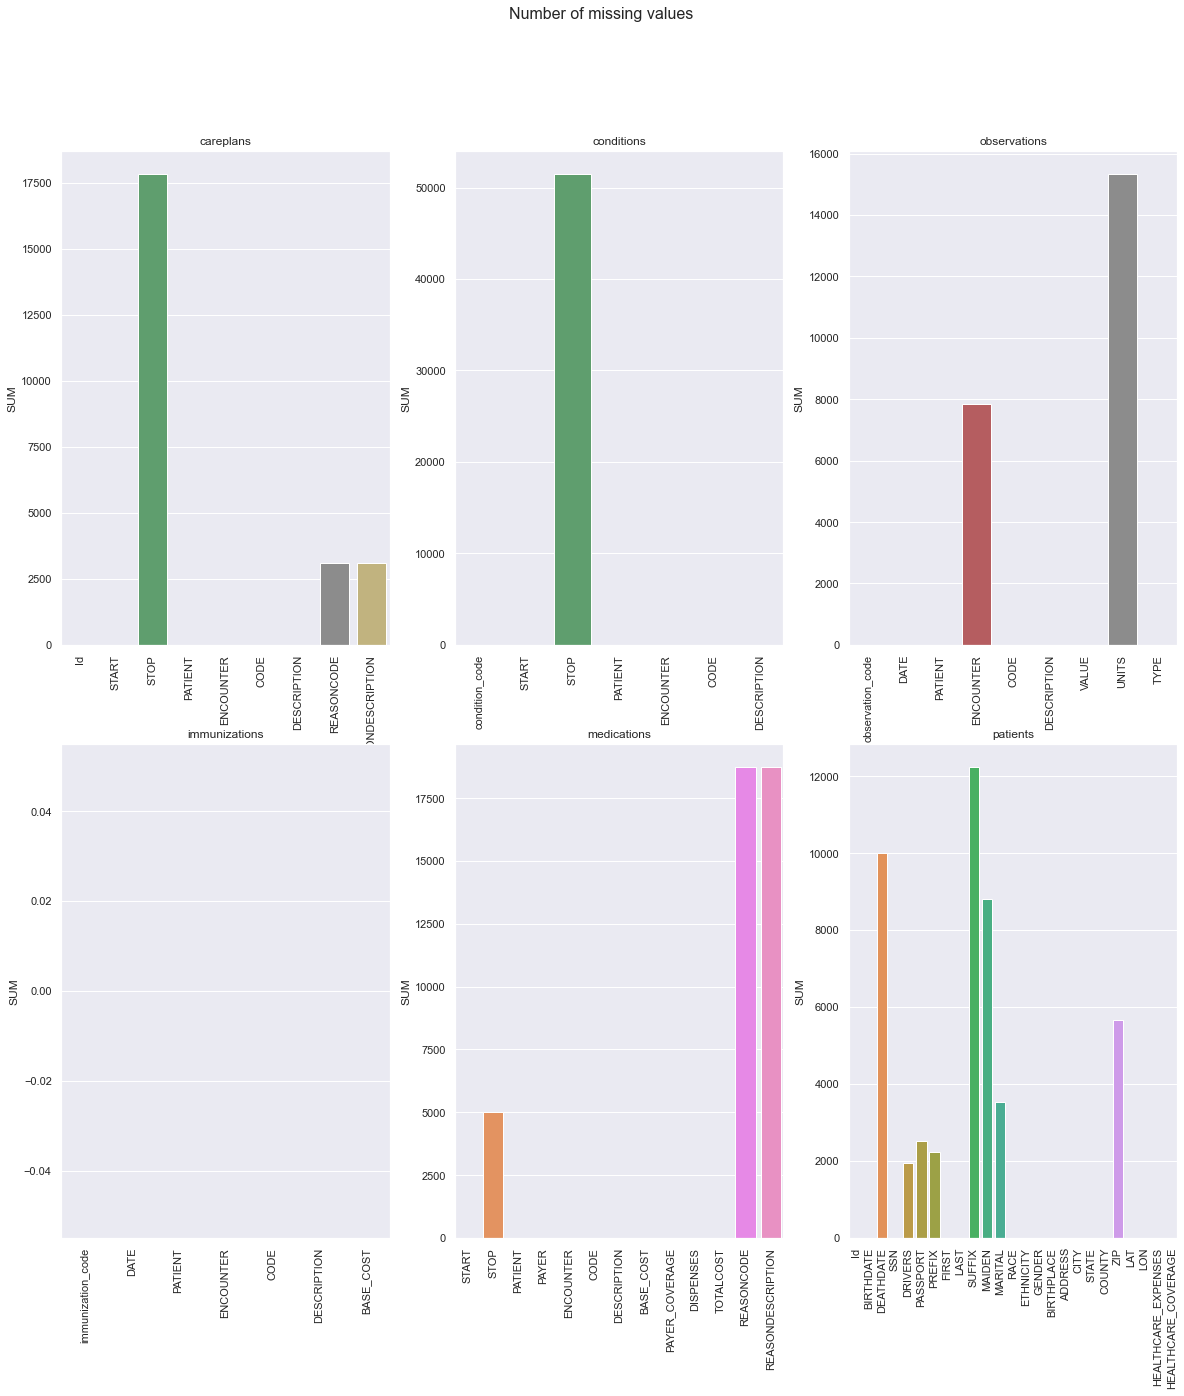

In [39]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3)

sns.set()

#create boxplot in each subplot
sns.barplot(data=a, x=a.index, y="SUM", ax=axes[0,0])
sns.barplot(data=b, x=b.index, y='SUM', ax=axes[0,1])
sns.barplot(data=c, x=c.index, y='SUM', ax=axes[1,0])
sns.barplot(data=d, x=d.index, y='SUM', ax=axes[1,1])
sns.barplot(data=e, x=e.index, y='SUM', ax=axes[0,2])
sns.barplot(data=f, x=f.index, y='SUM', ax=axes[1,2])

axes[0,0].set_xticklabels(labels=a.index, rotation=90)
axes[0,1].set_xticklabels(labels=b.index, rotation=90)
axes[1,0].set_xticklabels(labels=c.index, rotation=90)
axes[1,1].set_xticklabels(labels=d.index, rotation=90)
axes[0,2].set_xticklabels(labels=e.index, rotation=90)
axes[1,2].set_xticklabels(labels=f.index, rotation=90)

axes[0,0].set(title='careplans')
axes[0,1].set(title='conditions')
axes[1,0].set(title='immunizations')
axes[1,1].set(title='medications')
axes[0,2].set(title='observations')
axes[1,2].set(title='patients')

# plt.title(list_of_dfs[0][1], fontsize=16)
# plt.yticks(fontsize=16)
plt.suptitle("Number of missing values", fontsize="16")
plt.gcf().set_size_inches(20, 20)

## Anzahl Duplikate herausfinden

In [ ]:
for ele in tupel_of_dataframes:
    print("------------------------------")
    print("Table: ", ele[1])
    print(ele[0][ele[0].duplicated()])

------------------------------
Table:  careplans
Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ENCOUNTER, CODE, DESCRIPTION, REASONCODE, REASONDESCRIPTION]
Index: []
------------------------------
Table:  conditions
Empty DataFrame
Columns: [condition_code, START, STOP, PATIENT, ENCOUNTER, CODE, DESCRIPTION]
Index: []
------------------------------
Table:  immunizations
Empty DataFrame
Columns: [immunization_code, DATE, PATIENT, ENCOUNTER, CODE, DESCRIPTION, BASE_COST]
Index: []
------------------------------
Table:  medications
Empty DataFrame
Columns: [START, STOP, PATIENT, PAYER, ENCOUNTER, CODE, DESCRIPTION, BASE_COST, PAYER_COVERAGE, DISPENSES, TOTALCOST, REASONCODE, REASONDESCRIPTION]
Index: []
------------------------------
Table:  observations
Empty DataFrame
Columns: [observation_code, DATE, PATIENT, ENCOUNTER, CODE, DESCRIPTION, VALUE, UNITS, TYPE]
Index: []
------------------------------
Table:  patients
Empty DataFrame
Columns: [Id, BIRTHDATE, DEATHDATE, SSN, DRIVERS,

## Ergeben unsere Daten Sinn?

Überprüfen, ob Daten von vor 1900 oder aus der Zukunft vorhanden sind

In [ ]:
today = datetime.date.today()
for ele in tupel_of_dataframes: 
    print("------------------------------")
    print("Table: ", ele[1])    
    
    if 'START' in ele[0].columns:
        ele[0]["START"] = pd.to_datetime(ele[0]["START"])
        print("START vor 1900: ", (ele[0]["START"] < datetime.datetime(1900, 1, 1)).sum())
        print("START in der Zukunft: ", (ele[0]["START"] > today.strftime("%Y-%m-%d")).sum())

    if 'STOP' in ele[0].columns:
        ele[0]['STOP'] = pd.to_datetime(ele[0]['STOP'])
        print("STOP vor 1900: ", (ele[0]['STOP'] < datetime.datetime(1900, 1, 1)).sum())
        
    if 'DATE' in ele[0].columns:
        ele[0]['DATE'] = pd.to_datetime(ele[0]['DATE'])
        print("DATE vor 1900: ", (ele[0]['DATE'] < datetime.datetime(1900, 1, 1)).sum())
        print("DATE in der Zukunft: ", (ele[0]["DATE"] > today.strftime("%Y-%m-%d")).sum())

    if 'BIRTHDATE' and 'DEATHDATE' in ele[0].columns:
        ele[0]['BIRTHDATE'] = pd.to_datetime(ele[0]['BIRTHDATE'])
        ele[0]['DEATHDATE'] = pd.to_datetime(ele[0]['DEATHDATE'])
        print("BIRTHDATE vor 1900: ", (ele[0]['BIRTHDATE'] < datetime.datetime(1900, 1, 1)).sum())
        print("BIRTHDATE in der Zukunft: ", (ele[0]["BIRTHDATE"] > today.strftime("%Y-%m-%d")).sum())
        print("DEATHDATE vor 1900: ", (ele[0]["DEATHDATE"] < datetime.datetime(1900, 1, 1)).sum())
        print("DEATHDATE in der Zukunft: ", (ele[0]["DEATHDATE"] > today.strftime("%Y-%m-%d")).sum())


------------------------------
Table:  careplans
START vor 1900:  0
START in der Zukunft:  0
STOP vor 1900:  0
------------------------------
Table:  conditions
START vor 1900:  0
START in der Zukunft:  0
STOP vor 1900:  0
------------------------------
Table:  immunizations
DATE vor 1900:  0
DATE in der Zukunft:  0
------------------------------
Table:  medications
START vor 1900:  0
START in der Zukunft:  0
STOP vor 1900:  0
------------------------------
Table:  observations
DATE vor 1900:  0
DATE in der Zukunft:  0
------------------------------
Table:  patients
BIRTHDATE vor 1900:  0
BIRTHDATE in der Zukunft:  0
DEATHDATE vor 1900:  0
DEATHDATE in der Zukunft:  0


In [ ]:
conn.close()
logging.debug(" "+str(datetime.datetime.now()) + " daten_qualitaet.ipynb closed the connection to the database")

In [ ]:
#würde datenquali verbessern
# careplans_df["REASONCODE"] = careplans_df["REASONCODE"].replace(np.nan, 'N/A')
# careplans_df["REASONDESCRIPTION"] = careplans_df["REASONCODE"].replace(np.nan, 'N/A')
# careplans_df.isnull().sum()